In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=";").dropna()
df  # print(df) 와 동일

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
# 가능하면 프로그램을 step-by-step으로 수행하도록 나눠서 작성요망

In [32]:
#레이블 불균형 확인

df['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


Text(0.5, 1.0, 'Quality')

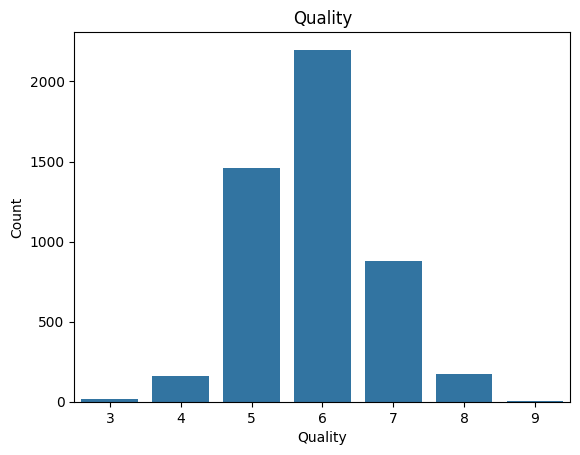

In [33]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="quality")
plt.xlabel("Quality")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Quality")

In [34]:
# 결측치 확인
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [35]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [36]:
df.columns  # 컬럼명 확인

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 2) 입력/출력 분리 (quality만 타깃)
X = df.drop("quality", axis=1)
y = df["quality"]

# 3) 학습/평가 분리 (불균형 대비 stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4) 모델 학습 (불균형 대비 class_weight)
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# 5) 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.24      0.36        33
           5       0.72      0.64      0.68       291
           6       0.63      0.81      0.71       440
           7       0.68      0.47      0.56       176
           8       0.95      0.54      0.69        35
           9       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.52      0.39      0.43       980
weighted avg       0.68      0.67      0.66       980



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
df # 모든 컬럼 값이 숫자로 변경되었는지 확인

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [39]:
X # 분리 후 확인

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [40]:
y # 분리 후 확인

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [41]:
# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)



In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((3918, 11), (980, 11), (3918,), (980,))

In [43]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)



In [44]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [45]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [46]:
# 정답값 출력

y_test

,quality
1740,6
2658,7
1203,6
3985,6
2945,8
...,...
4393,6
1454,5
2576,5
4501,6


In [47]:
#예측값 출력

dt_y_pred

array([5, 7, 6, 7, 5, 6, 5, 6, 5, 6, 7, 7, 6, 7, 5, 4, 6, 8, 6, 6, 6, 7,
       5, 6, 6, 7, 6, 6, 8, 6, 6, 6, 6, 7, 6, 5, 6, 7, 5, 5, 7, 5, 7, 6,
       5, 5, 4, 6, 6, 4, 6, 6, 6, 6, 5, 7, 6, 4, 5, 5, 7, 6, 7, 5, 5, 7,
       5, 6, 6, 5, 7, 6, 5, 6, 7, 5, 6, 6, 6, 7, 6, 6, 7, 5, 5, 7, 6, 6,
       5, 7, 8, 6, 5, 6, 5, 6, 6, 5, 7, 6, 5, 6, 5, 4, 4, 6, 8, 6, 6, 6,
       6, 5, 5, 6, 5, 8, 7, 7, 6, 6, 6, 6, 5, 5, 7, 4, 5, 7, 7, 6, 5, 6,
       5, 6, 7, 8, 5, 6, 6, 6, 7, 5, 5, 6, 6, 6, 6, 8, 8, 7, 8, 7, 5, 5,
       7, 5, 5, 7, 6, 6, 6, 7, 5, 7, 5, 5, 7, 6, 7, 5, 6, 5, 7, 6, 6, 6,
       6, 6, 6, 7, 5, 7, 6, 6, 6, 6, 7, 7, 6, 6, 5, 7, 5, 7, 6, 6, 6, 5,
       7, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 5, 6, 4, 6, 5, 7, 6, 7, 7, 7,
       6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 7, 7, 5, 5, 7, 6,
       5, 7, 8, 5, 6, 7, 7, 5, 8, 7, 6, 6, 6, 4, 7, 6, 5, 6, 6, 6, 5, 5,
       5, 7, 6, 6, 7, 6, 6, 6, 4, 5, 6, 6, 7, 6, 8, 6, 6, 7, 6, 5, 6, 6,
       6, 7, 5, 7, 7, 7, 7, 5, 5, 6, 7, 7, 5, 6, 5,

In [49]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))


=== DT Test Accuracy ===
Decision Tree : 0.5908
[[  0   1   2   1   0   0   0]
 [  0   9  14   8   1   1   0]
 [  0  15 174  81  14   7   0]
 [  1  12  81 275  62   9   0]
 [  0   1  15  55 100   5   0]
 [  0   1   1   6   6  21   0]
 [  0   0   0   0   1   0   0]]
=== RF Test Accuracy ===
Random Forest : 0.6776
[[  0   0   1   3   0   0   0]
 [  0   7  18   8   0   0   0]
 [  0   3 191  97   0   0   0]
 [  0   1  50 362  27   0   0]
 [  0   0   4  87  85   0   0]
 [  0   0   1   8   7  19   0]
 [  0   0   0   0   1   0   0]]
=== LR Test Accuracy ===
Logistic Reg. : 0.5173
[[  0   0   1   3   0   0   0]
 [  0   0  19  14   0   0   0]
 [  0   0 135 156   0   0   0]
 [  0   1  75 358   6   0   0]
 [  0   0  16 146  14   0   0]
 [  0   0   7  21   7   0   0]
 [  0   0   0   1   0   0   0]]


In [59]:
from sklearn.linear_model import LinearRegression
import random

k = random.randint(1,980)
lr = LinearRegression()

lr.fit(X_train, y_train)

#print(lr.predict(X_test))

print(lr.coef_,lr.intercept_)

[ 5.63184569e-02 -1.91319724e+00  1.17611026e-01  7.90446534e-02
 -5.97902985e-01  3.35631381e-03 -3.59970114e-05 -1.42678571e+02
  6.84950964e-01  6.01928701e-01  2.04803097e-01] 142.58862718711305
